# Using matplotlib

### Some plotting options

### Old pyplot lib

Namespaces populated:
* from numpy import *
* from matplotlib import *

##### Run pylab scripts from the command line

In [ ]:
# > ipython 1-pylabplot.py --pylab (use --pylab)
# > ipython 1-pylabplot.py --pylab qt (use --pylab)

##### Using pylab interactively

In [1]:
# from pylab import * 
# or use magic:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


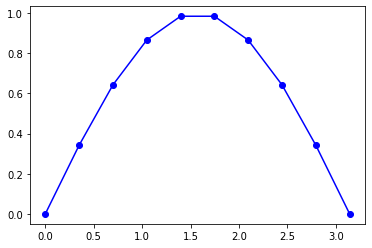

In [4]:
# Generate data
x = array(linspace(0, pi, 10))
y = sin(x)

# basic plotting
plot(x, y, 'bo-')  
show()

##### Run pylab scripts from ipython

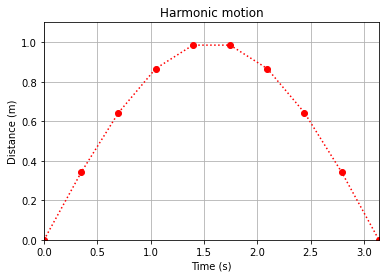

<Figure size 432x288 with 0 Axes>

In [5]:
# pylab imported inside the module: 
# >> from pylab import * 

%run ./scripts/2-pylabplot.py

### Standard way to load matplotlib

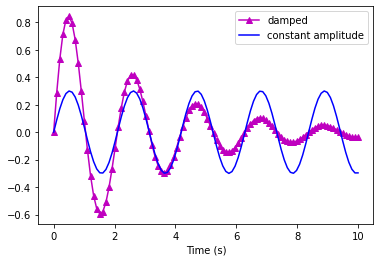

<Figure size 432x288 with 0 Axes>

In [6]:
# Running matplotlib from a script

%run ./scripts/3-matplotlib.py

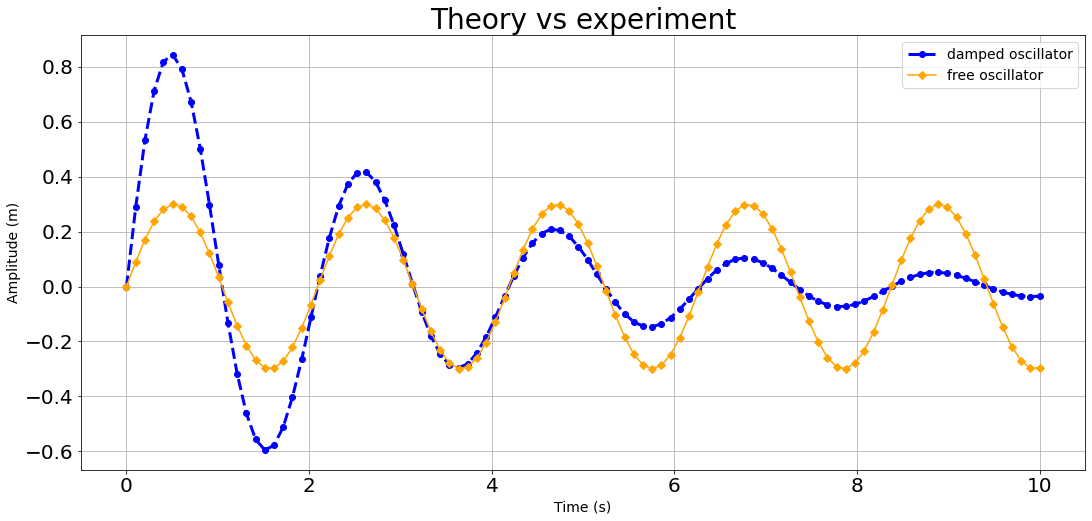

In [11]:
# Load matplotlib interactively

import numpy as np
import matplotlib.pyplot as plt

# try: qt
%matplotlib inline 

time = np.linspace(0.0, 10.0, 100)
height = np.exp(-time/3.0)*np.sin(time*3)

plt.figure(figsize=(18, 8))

plt.plot(time, height, 'b--o', ms=6, lw=3)
plt.plot(time, 0.3*np.sin(time*3), '-D', color='orange')

plt.legend(['damped oscillator', 'free oscillator'], loc='upper right', fontsize=14)

plt.title('Theory vs experiment', fontsize=28)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Amplitude (m)', fontsize=14)

plt.tick_params(labelsize=20)

plt.grid()

plt.show()

### Saving plots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-pi, pi, pi/100)

cm = 1/2.54
plt.figure(figsize=(20*cm, 15*cm), dpi=150)

plot(x, np.sin(x), 'b-', label='sine')
plot(x, np.cos(x), 'g--', label='cosine')
plot(x, np.tan(x), 'ro:', label='tan')

plt.xlabel('xvalue')
plt.ylabel('trig function value')
plt.xlim(-np.pi,np.pi)
plt.ylim(-3,3)
plt.legend (loc='upper left')

plt.savefig('plot1.png')
plt.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-pi, pi, pi/100)

plt.figure()

plot(x, np.sin(x), 'b-', label='sine')
plot(x, np.cos(x), 'g--', label='cosine')
plot(x, np.tan(x), 'ro:', label='tan')

plt.xlabel('xvalue')
plt.ylabel('trig function value')
plt.xlim(-np.pi,np.pi)
plt.ylim(-3,3)
plt.legend (loc='upper left')

cm = 1/2.54
figH = plt.gcf()
figH.set_size_inches(20*cm, 15*cm)

plt.savefig('plot2.png', dpi=150)
plt.close()

### Plotting from a file

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x, y1, y2 = np.loadtxt('./data/data-3-col.dat', unpack = True)

plt.figure()
plt.plot(x, y1, 'r-', x, y2, 'b-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (arbitrary units)')
plt.legend(['serie 1', 'serie 2'])
plt.show()

### Plots several functions 

In [ ]:
# Plotting several trig functions
import numpy as np
import matplotlib.pyplot as plt

def plottrig(f, legend=None):
    xvalues = np.linspace(-pi,pi,100)
    plt.plot(xvalues, f(xvalues))
    plt.xlim(-pi,pi)
    plt.ylim(-2,2)
    if legend != None:
        plt.legend([legend])

In [ ]:
figure(0)   
plottrig(np.sin, legend="sin(x)")   

In [ ]:
# generate data
trig_functions = [np.sin, np.cos, np.tan]
trig_legends = ['sin', 'cos', 'tan']
trig_data = list(zip(trig_functions, trig_legends))  # zip can only be iterated once

figure(1)
for func in trig_functions :
    plottrig(func)

In [ ]:
i = 2
# %matplotlib qt
for (function, legend) in trig_data:
    figure(i)
    plottrig(function, legend) 
    i = i + 1

In [ ]:
figure(6)
for func in trig_functions:
    plottrig(func)
plt.legend(trig_legends)

# plt.show()

### Manipulate figures

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6)) 
ax.plot(x, y, 'o--')
ax.set_xlabel('time', fontsize=14)
ax.set_ylabel('amplitude', fontsize=14)
plt.grid()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8)) 
plt.subplots_adjust(wspace=0.3, hspace=0.4)

ax = axes[0,0]
ax.plot(x, y, 'o--')
ax.set_xlabel('time')
ax.set_ylabel('amplitude')
ax.set_title('sin function')
ax.grid()

ax = axes[0,2]
ax.plot(x, y, 'o--', label='series 1')
ax.set_xlabel('time')
ax.set_ylabel('amplitude')
ax.tick_params(axis='x', labelsize=8)
ax.legend()
ax.grid()

ax = axes[1,1]
ax.plot(x, y, 'o--', label='series 1')
ax.text(1.2, 0.3, 'sin function')
ax.set_xlabel('time')
ax.set_ylabel('amplitude')
ax.legend(loc='upper right')
ax.grid()

ax = axes[1,2]
ax.plot(x, y, 'o--', label='series 1')
ax.text(0.5, 0.5, '${mean}_{data}$ = %0.2f' % np.mean(x), bbox = {'edgecolor':'red', 'facecolor':'white'}, 
        fontsize=14, transform=ax.transAxes, ha='center') # transform=ax.transAxes: scaled coords
ax.set_title('sin function')
ax.set_xlabel('time')
ax.set_ylabel('amplitude')
ax.legend(loc='upper right', edgecolor='red')
ax.grid()

fig.text(0.5, -0.005, 'Different views of sin function', fontsize=20, ha='center') # transform=ax.transAxes: scaled coords
plt.show()

### Other type of plots

##### Histograms

In [ ]:
values = np.loadtxt("./data/normal.dat")

In [ ]:
# bins: number of bins
# density: normalized to 1
# histtype: 'bar', 'barstacked', 'step', 'stepfilled'
val_hist = plt.hist(values, bins=25, density=True, histtype='bar')
plt.grid()

In [ ]:
val_hist

##### Surfaces and contours

In [ ]:
ls = linspace(-1, 1, 100)
x, y = np.meshgrid(ls, ls)
z = x**2 + y**2

In [ ]:
plt.figure(figsize=(6, 6))
plt.contourf(x, y, z, levels=80, vmax=1.5, cmap='cividis')
plt.axis('square') # plt.gca().set_aspect('equal')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
cp = plt.contour(x, y, z, levels=10, cmap='cividis')
plt.clabel(cp, fontsize=10)
plt.axis('square') # plt.gca().set_aspect('equal')
plt.show()

In [ ]:
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, edgecolor='black', vmax=1.5, cmap='coolwarm')
ax.set_title('Surface plot')
plt.show()

# Links of interest

* Matplotlib documentation
    
    https://matplotlib.org/3.5.1/index.html \
    https://matplotlib.org/3.5.1/users/index.html \
    https://matplotlib.org/3.5.1/tutorials/index.html

* Scientific plots

    https://github.com/garrettj403/SciencePlots

* colormaps

    https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
